# A small example, with structure only
This example is included to illustrate that it is possible to use some of the functionality of the toolbox on models where you only have the model structure and not the analytical expressions.

The example illustrates sensor placement analysis of the model in

"_Structural analysis for the sensor location problem in fault detection and isolation_" by C. Commault, J. Dion and S.Y. Agha, Proceedings of Safeprocess'06 Beijing, China.

Important note. To compare results, there is an important difference in that in the approach used in this toolbox, in contrast to the Commault et.al. paper, fault signals are not considered measurable.

In [1]:
import faultdiagnosistoolbox as fdt
import matplotlib.pyplot as plt

First define the model, of type `MatrixStruc`, indicating that only the adjacency matrices are provided.

In [2]:
model_def = {'type': 'MatrixStruc',
             'X': [[0, 0, 0, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0, 1],
                   [0, 0, 0, 0, 0, 1, 0],
                   [1, 0, 0, 0, 1, 0, 1],
                   [0, 1, 0, 0, 0, 1, 0],
                   [1, 1, 1, 0, 0, 0, 0],
                   [1, 1, 0, 1, 0, 0, 0],
                   [0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 1, 1, 0, 0, 0],
                   [0, 0, 0, 1, 0, 0, 0]],
             'F': [[1, 0, 0, 0],
                   [0, 1, 0, 0],
                   [0, 0, 0, 1],
                   [0, 0, 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 0],
                   [0, 0, 0, 0],
                   [0, 0, 0, 0],
                   [0, 0, 0, 0],
                   [0, 0, 0, 0]],
             'Z': [[0, 0, 0],
                   [0, 0, 0],
                   [0, 0, 0],
                   [0, 0, 0],
                   [0, 0, 0],
                   [0, 0, 0],
                   [0, 0, 0],
                   [1, 0, 0],
                   [0, 1, 0],
                   [0, 0, 1]]}

model = fdt.DiagnosisModel(model_def, name='Example from Commault et.al')
model.Lint()

Model: Example from Commault et.al

  Type:Structural, static

  Variables and equations
    7 unknown variables
    3 known variables
    4 fault variables
    10 equations, including 0 differential constraints

  Degree of redundancy: 3
  Degree of redundancy of MTES set: 1


  Model validation finished with 0 errors and 0 warnings.


Plot the model structure and initial fault isolability performance of the model

array([[1, 1, 0, 0],
       [1, 1, 0, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 1]])

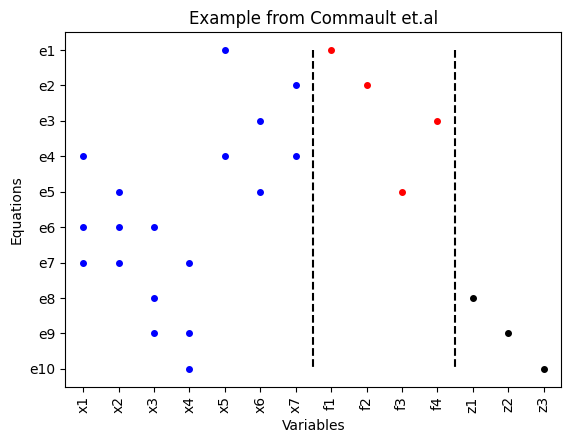

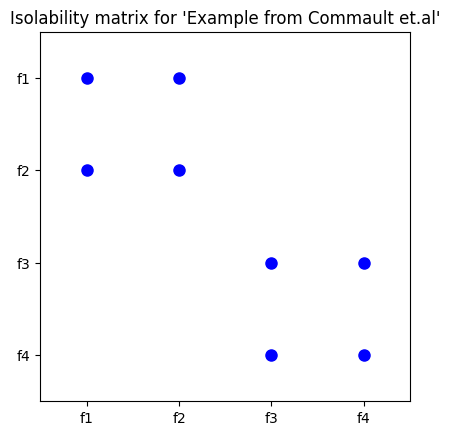

In [3]:
_, ax = plt.subplots(num=10)
model.PlotModel(ax=ax, verbose=True)

_, ax = plt.subplots(num=20)
model.IsolabilityAnalysis(ax=ax)

The fault isolation properties can also be directly seen in an extended Dulmage-Mendelsohn decomposition.

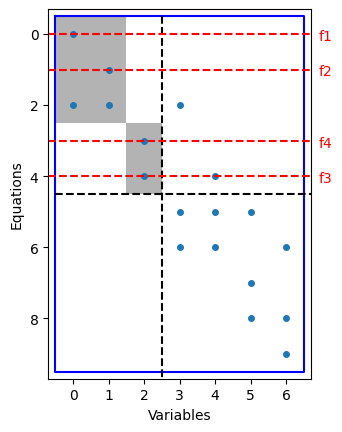

In [4]:
_, ax = plt.subplots(num=30)
model.PlotDM(eqclass=True, fault=True)

Since all faults are not uniquely isolable, it is interesting to see which additional sensors are needed to achieve full isolability. This cna be computed using the `SensorPlacementIsolability` class method

In [5]:
sensSets, _ = model.SensorPlacementIsolability()
print(f"Found {len(sensSets)} sensor sets")
print(sensSets)

Found 2 sensor sets
[['x5', 'x6'], ['x6', 'x7']]


Let's add the first solution and verify that we get full isolability.

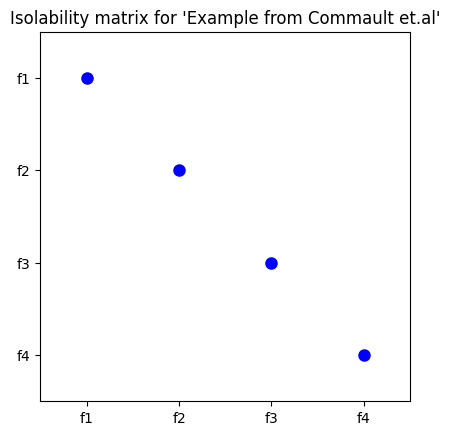

In [6]:
model2 = model.copy()
model2.AddSensors(sensSets[0])
_, ax = plt.subplots(num=30)
_ = model2.IsolabilityAnalysis(ax=ax)